# Chapter 5 of the Syllabus Transient Groundwater Flow

@T.N.Olsthoorn, Dec 2019

## One-dimensional transient groundwater flow in the case of half-infinite and bounded aquifers


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

In [7]:
def newfig(title='no title', xlabel='t [d]', ylabel='s [m]', xlim=None, ylim=None,
               xscale='linear', yscale='linear', size_inches=(14, 6)):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.grid(True)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    return ax

# Sinusoidal fluctuations of river stage (river-water level)


## Compare $sin(x) + cos(x)$  with $\sqrt 2 \, sin(x + \pi/4)$

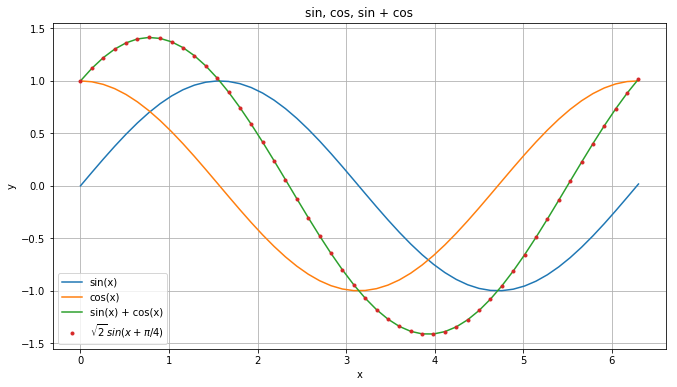

In [8]:
x = np.pi * 2 * np.linspace(0, 361) / 360

fig, ax = plt.subplots()
fig.set_size_inches(11, 6)
ax.grid(True)
ax.set_title('sin, cos, sin + cos')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)')
ax.plot(x, np.sin(x) + np.cos(x), label='sin(x) + cos(x)')
ax.plot(x, np.sqrt(2) * np.sin(x + np.pi/4), '.', label = '$\sqrt{2} \, sin(x + \pi/4)$')
ax.legend()

# Sinusoidal fluctuations

In [9]:
def newfig(title='title', xlabel='xlabel', ylabel='ylabel', xscale='linear', yscale='linear',
           xlim=None, ylim=None):
    '''Return fig, ax of a new figure
    '''
    fig, ax = plt.subplots()
    fig.set_size_inches(11, 6)
    
    ax.grid(True)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlabel: ax.set_xlabel(xlabel)
    if ylabel: ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)

    return ax


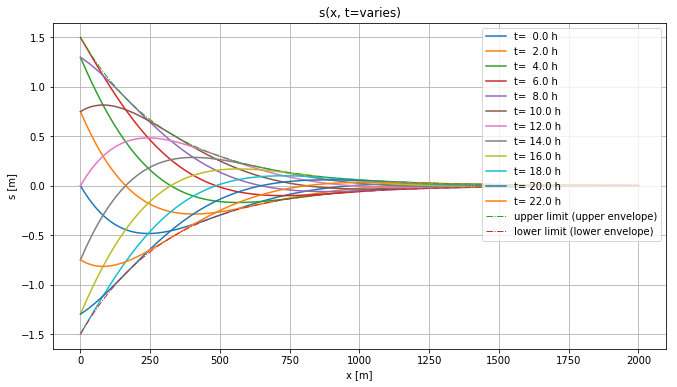

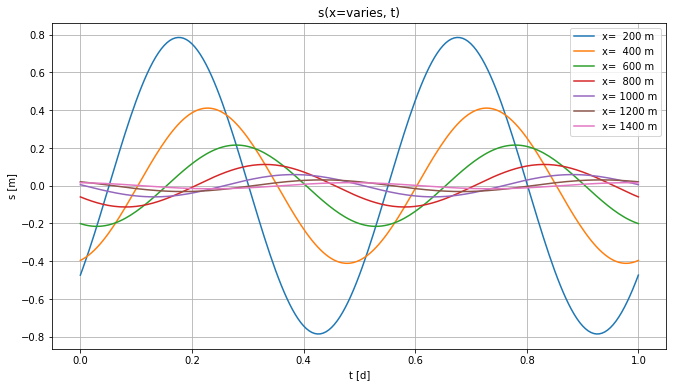

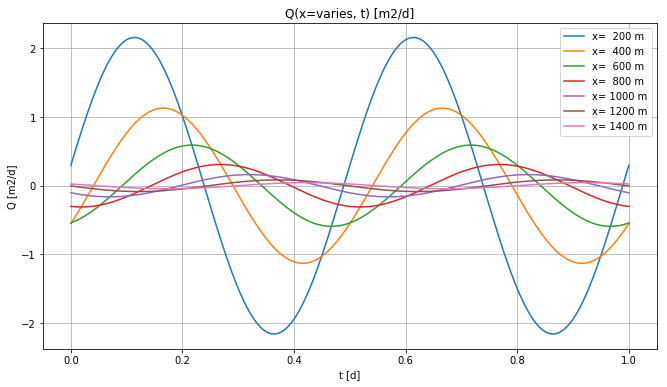

In [10]:
kD = 600 # transmissivity m2/d
S = 0.001 # storage coefficient [-]
x_ = np.linspace(0, 2000, 201) # distances in m
t_ = np.linspace(0, 1, 201) # times in d
omega = 4 * np.pi # rad/d
A = 1.5 # amplitude of tide [m]
beta = 2/24 * (4 * np.pi) # radians, 2h delay (2 hours of 4 pi per day)

a = np.sqrt(omega * S / (2 * kD)) # damping [1/d]

# for all x at t=0
t, x = 0, x_
ax = newfig(title='s(x, t=varies)', xlabel='x [m]', ylabel='s [m]')
for dt in np.arange(0, 24., 2):
    beta =  dt / 24 * (2 * np.pi)
    ax.plot(x, A * np.exp(-a * x) * np.sin(omega * t - a * x + beta), label='t={:5.1f} h'.format(dt))
ax.plot(x, + A * np.exp(-a * x), '-.', lw=1.0, label='upper limit (upper envelope)')
ax.plot(x, - A * np.exp(-a * x), '-.', lw=1.0, label='lower limit (lower envelope)')
ax.legend(loc='upper right')

# for all t at x = 500
t, beta = t_, 0
ax1 = newfig(title='s(x=varies, t)', xlabel='t [d]', ylabel='s [m]')
for x in np.arange(200, 1500, 200):
    ax1.plot(t, A * np.exp(-a * x) * np.sin(omega * t - a * x + beta), label='x={:5.0f} m'.format(x))
ax1.legend(loc='best')

# discharges for all t at x = 500
t, beta = t_, 0
ax2 = newfig(title='Q(x=varies, t) [m2/d]', xlabel='t [d]', ylabel='Q [m2/d]')
for x in np.arange(200, 1500, 200):
    ax2.plot(t, a * kD * A * np.sqrt(2) * np.exp(-a * x) * np.sin(omega * t - a * x + beta + np.pi/4), label='x={:5.0f} m'.format(x))
ax2.legend(loc='best')




# Sudden surface water stage change at $x=0$

# Complementary error function $\mathtt{erfc}(-)$

The analytical solution of the head in an aquifer directly connected to surface water in which the water level suddenly changes contains the complementary error function. Together with numerous other mathematical functions,the complementary error function is is available in the Python module `scipy.special`. Let's first examine the complementary error function.

$$\mathtt{erfc}(u) = \frac {2} {\sqrt{\pi}} \intop_u^\infty e^{-y^2}dy$$

so that

$$\frac {d \mathtt{erfc}(u)}{du}= -\frac 2 {\sqrt{\pi}} e^{-u^2}$$

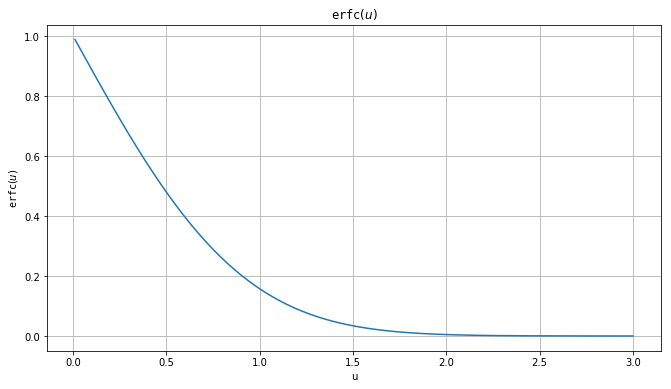

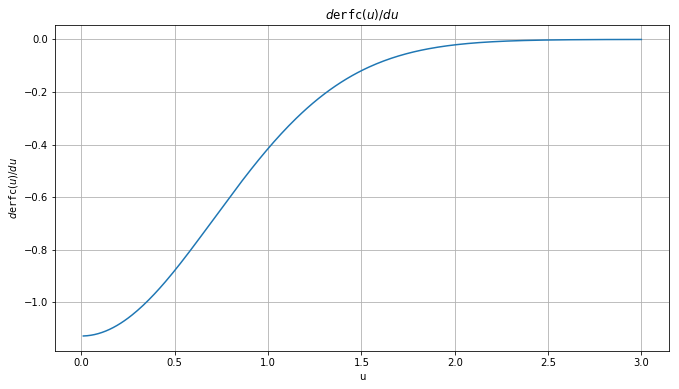

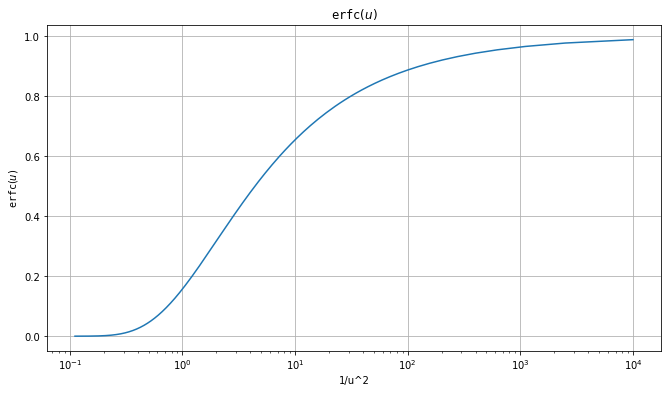

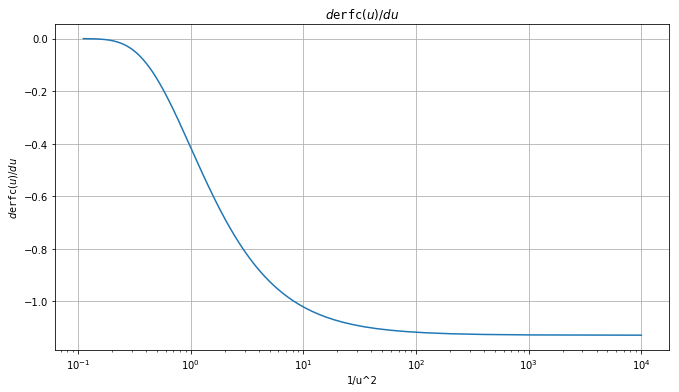

In [11]:
u = np.linspace(0, 3, 301); u=u[1:]

ax0 = newfig(title='$\mathtt{erfc}(u)$', xlabel='u', ylabel='$\mathtt{erfc}(u)$')
ax1 = newfig(title='$d\mathtt{erfc}(u)/du$', xlabel='u', ylabel='$d\mathtt{erfc}(u)/du$')
ax2 = newfig(title='$\mathtt{erfc}(u)$', xlabel='1/u^2', ylabel='$\mathtt{erfc}(u)$', xscale='log')
ax3 = newfig(title='$d\mathtt{erfc}(u)/du$', xlabel='1/u^2', ylabel='$d\mathtt{erfc}(u)/du$', xscale='log')
ax0.plot(u, erfc(u), label='$\mathtt{erfc}(u)$')
ax1.plot(u, -2/np.sqrt(np.pi) * np.exp(-u**2), label='$d\,\mathtt{erfc}(u)/du$')
ax2.plot(1/u**2, erfc(u), label='$\mathtt{erfc}(u)/du$')
ax3.plot(1/u**2, -2/np.sqrt(np.pi) * np.exp(-u**2), label='$d\,\mathtt{erfc}(u)/du$')

# Sudden change of surface water level

## Basic solution

Below the effect of a sudden change of the surface water level at $x=0$ is presented.

The solution for the change of head is

$$s(x, t) = A \, \mathtt{erfc}\left(u\right),\,\,\,\mathtt{with}\,\,\,\,u=\sqrt{\frac{x^2 S}{4 kD t}} $$

The dicharge is

$$Q(x, t) = -kD \frac {\partial s}{\partial x} = A \sqrt{\frac{kDS}{\pi\,t}}\exp\left(-\frac{x^2 S}{4 kD t}\right)$$

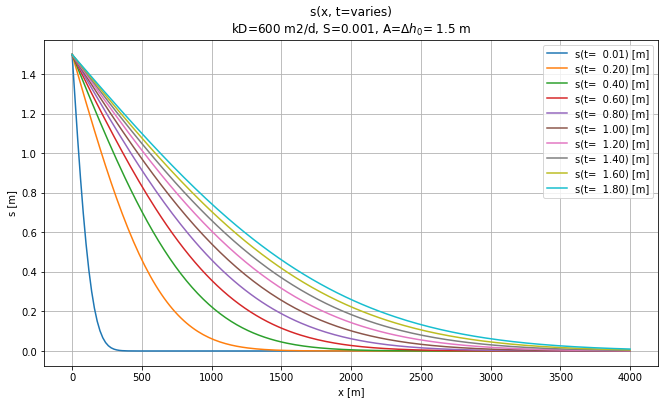

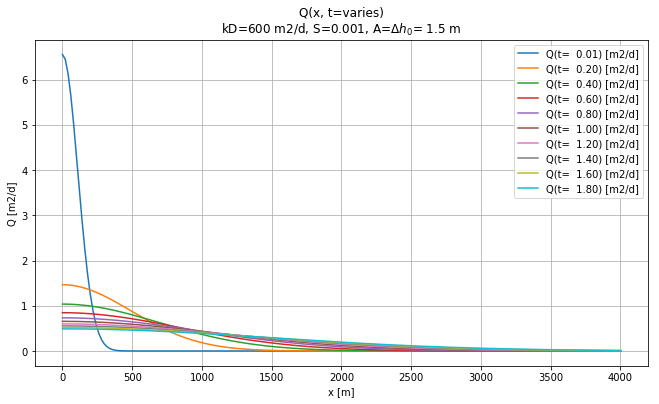

In [14]:
# Aquifer and boundary
kD = 600 # transmissivity m2/d
S = 0.001 # storage coefficient [-]
A = 1.5 # sudden change of surface water elvel [m]

# Simulation times and distances
x_ = np.linspace(0, 4000, 201) # distances in m
t_ = np.linspace(0, 1, 201) # times in d

t, x = np.arange(0, 2., 0.2), x_
t[0] = 1e-2
x[0] = 1e-2

subtitle = '\nkD={:.0f} m2/d, S={}, A=$\Delta h_0$={:4g} m'.format(kD, S, A)
ax0 = newfig(title='s(x, t=varies)' + subtitle, xlabel='x [m]', ylabel='s [m]')
ax1 = newfig(title='Q(x, t=varies)' + subtitle, xlabel='x [m]', ylabel='Q [m2/d]')
for dt in t:
    u = np.sqrt((x**2 * S)/(4 * kD * dt))
    ax0.plot(x, A * erfc(u), label='s(t={:6.2f}) [m]'.format(dt))
    ax1.plot(x, A * np.sqrt(kD * S / (np.pi * dt)) * np.exp(- u**2), label='Q(t={:6.2f}) [m2/d]'.format(dt))
ax0.legend(loc='upper right')
ax1.legend(loc='upper right')


## For syllabus inset picture

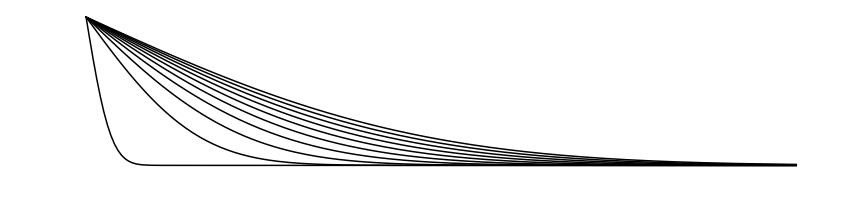

In [7]:
# Aquifer and boundary
kD = 600 # transmissivity m2/d
S = 0.001 # storage coefficient [-]
A = 1.5 # sudden change of surface water elvel [m]

# Simulation times and distances
x_ = np.linspace(0, 4000, 201) # distances in m
t_ = np.linspace(0, 1, 201) # times in d

t, x = np.arange(0, 2., 0.2), x_
t[0] = 1e-2
x[0] = 1e-2
ax0 = newfig(title='', xlabel='x [m]', ylabel='s [m]', size_inches=(14, 3))
ax0.set_axis_off()
for dt in t:
    u = np.sqrt((x**2 * S)/(4 * kD * dt))
    ax0.plot(x, A * erfc(u), 'k', label='s(t={:6.2f}) [m]'.format(dt))
#ax0.legend(loc='upper right')

# Aquifer adjacent to surface water with changing head

## More general series of solutions

A series of solutions can be expressed as

$$ s(x, t) = A t^{n/2} \frac{i^n \mathtt{erfc}\,u}{i^n\mathtt{erfc}\,0},\,\,\,\,u=\sqrt{\frac{x^2 S}{4 kD t}}$$

$$Q(x, t) = \frac{\sqrt{kD S}}{2\sqrt{t}} At^{n/2}\frac{i^{n-1}\mathtt{erfc}\,u}{i^n\mathtt{erfc}\,0}$$

Another way to write these solutions is replacing $\frac{\sqrt{kDS}}{2\sqrt{t}}A =B$, which yields
$$Q(x,t) = Bt^{n/2}\frac{i^{n-1}\mathtt{erfc}\,u}{i^n\mathtt{erfc}\,0}$$
$$s(x, t) = \frac {2\sqrt{t}} {\sqrt{kD S}} B t^{n/2} \frac{i^n \mathtt{erfc}\,u}{i^n\mathtt{erfc}\,0},\,\,\,\,u=\sqrt{\frac{x^2 S}{4 kD t}}$$

Hence, for a constant discharge, the head declines with the route of time. And for a linearly increasing discharge, the declines according to $t\sqrt{t}$.

## Show $i^n\mathtt{erfc}(u)$

In [9]:
def ierfc(z, n):
    '''Return nth repeated integral of complementary error function.
    parameters
    ----------
        z: float or complex
        n: int
    '''
    if n==0:
        return erfc(z)
    elif n==-1:
        return 2/np.sqrt(np.pi) * np.exp(-z**2)
    else:
        return -z/n * ierfc(z, n-1) + 1/(2 * n) * ierfc(z, n-2)
 

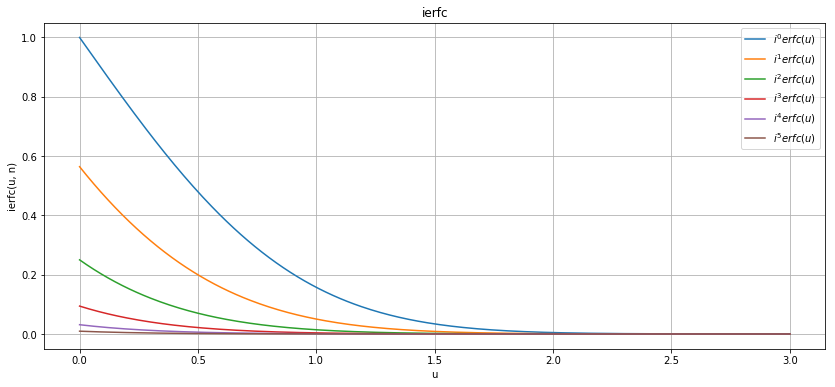

In [10]:
u = np.linspace(0, 3, 301)
ax = newfig(title='ierfc', xlabel='u', ylabel='ierfc(u, n)')
for n in range(6):
    ax.plot(u, ierfc(u, n), label='$i^{}erfc(u)$'.format(n))
ax.legend()

## Show $s(x,t)$ and $Q(x,t)$

In [11]:
def sQ(x, t, A=None, n=None, kD=None, S=None):
    u = x * np.sqrt(S / (4 * kD * t))
    s = A * t ** (n/2) * ierfc(u, n)   / ierfc(0, n)
    Q = A * t ** (n/2) * ierfc(u, n-1) / ierfc(0, n) * np.sqrt(kD * S) / (2 * np.sqrt(t))
    return s, Q
def Qs(x, t, B=None, n=None, kD=None, S=None):
    u = x * np.sqrt(S / (4 * kD * t))
    Q = B * t ** (n/2) * ierfc(u, n-1) / ierfc(0, n)
    s = B * t ** (n/2) * ierfc(u, n)   / ierfc(0, n) * 2 / np.sqrt(kD * S)
    return Q, s

## Example different shapes of stage rise curve

The A's are chosen such that each solution ends that the same level $H$ after a given $T$.


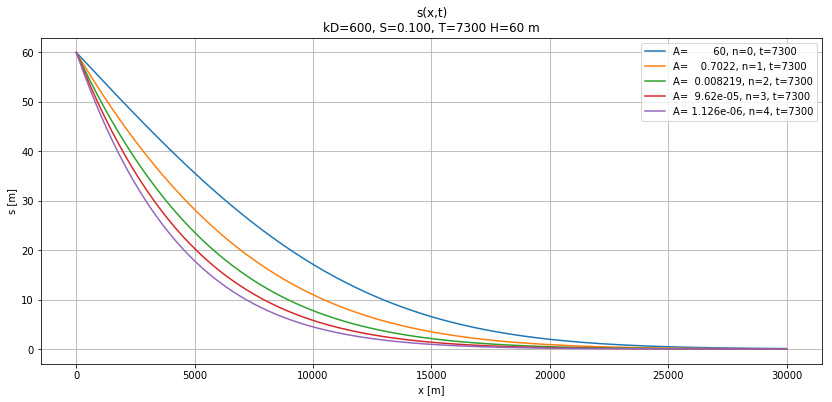

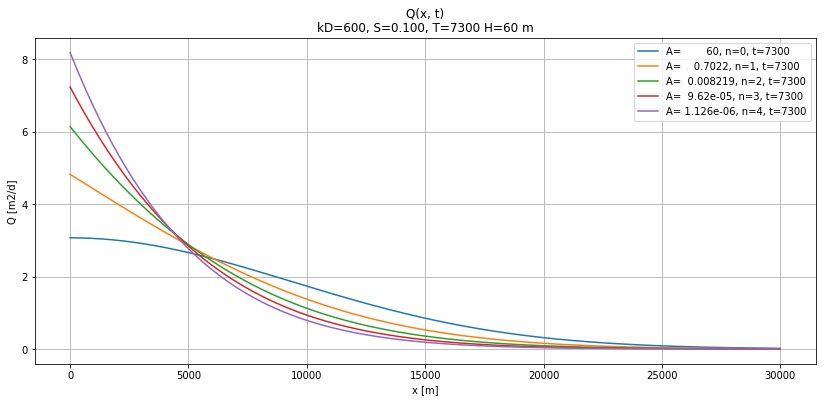

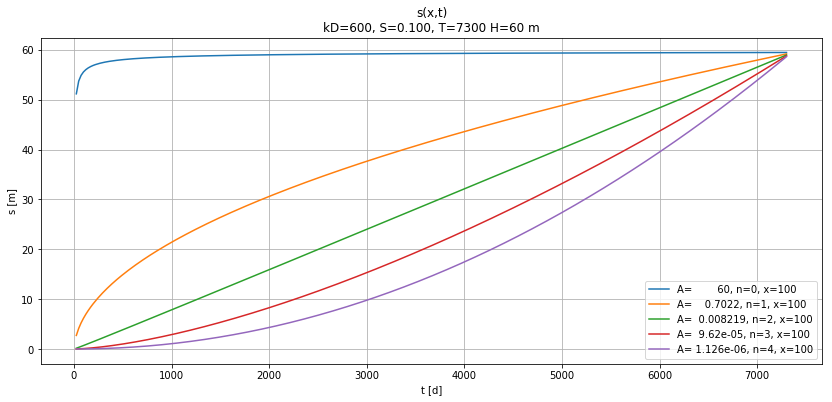

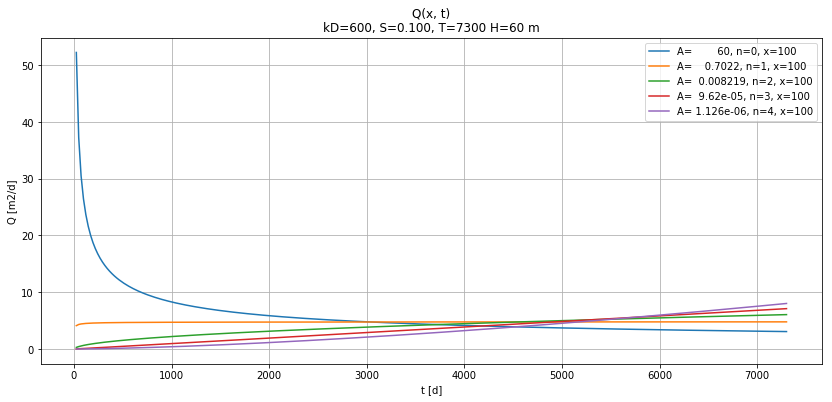

In [13]:
kD, S, T, H = 600, 0.1, 20 * 365, 60 # properties kD, S, total level rise time T, total rise H
x_ = np.linspace(0, 30000, 201) # all points
t_ = np.linspace(0, T, 301)    # all times
x = 100.    # individual point
t = 1.0 * T # indivual time

A = H * T ** -(np.arange(5.) / 2)   # m making sure all curves end at s=H at t=T

title = 'kD={:.0f}, S={:.3f}, T={:.0f} H={:.0f} m'.format(kD, S, T, H)
ax0 = newfig(title='s(x,t)\n' + title, xlabel='x [m]', ylabel='s [m]')
ax1 = newfig(title='Q(x, t)\n'+ title, xlabel='x [m]', ylabel='Q [m2/d]')
ax2 = newfig(title='s(x,t)\n' + title, xlabel='t [d]', ylabel='s [m]')
ax3 = newfig(title='Q(x, t)\n'+ title, xlabel='t [d]', ylabel='Q [m2/d]')

for n, a in enumerate(A):
    # for all x and one t
    s, Q = sQ(x_, t, A=a, n=n, kD=kD, S=S)
    ax0.plot(x_, s, label='A={:10.4g}, n={}, t={:.4g}'.format(a, n, t))
    ax1.plot(x_, Q, label='A={:10.4g}, n={}, t={:.4g}'.format(a, n, t))

    # for all t and one x
    s, Q = sQ(x, t_[1:], A=a, n=n, kD=kD, S=S)
    ax2.plot(t_[1:], s, label='A={:10.4g}, n={}, x={:.4g}'.format(a, n, x))
    ax3.plot(t_[1:], Q, label='A={:10.4g}, n={}, x={:.4g}'.format(a, n, x))
ax0.legend()
ax1.legend()
ax2.legend()
ax3.legend()

# Example, 60 m rise of lake Nasser, Egypt 1971-1991

To fill lake Nasser, Egypt, after the dam at Aswan was closed in 1971, took 20 year. During this period the lake level rose 60, which boils down to 3 m/year. If we may assume that the bordering aquifer along part of the lake is 200 m thick and that it has a conductivity $k=1$ [m/d] and a specific yield $S_{y}=0.1$, one could then ask the question: How far does the effect of the filling of the lake reach in the bordering aquifer, and, hence, how much lake water would have been stored in that same period?

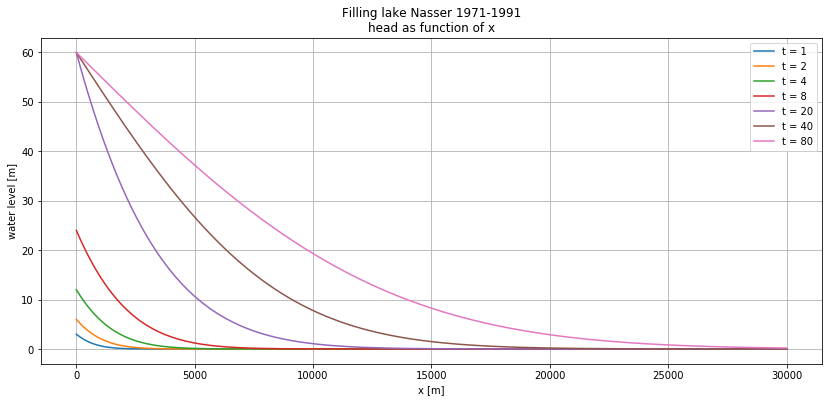

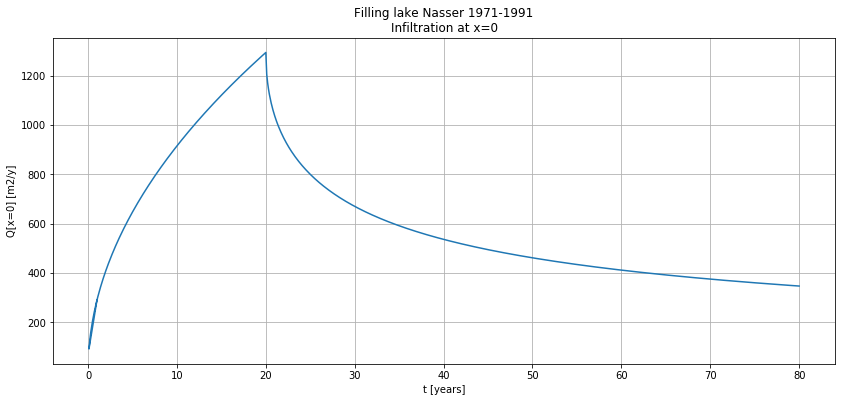

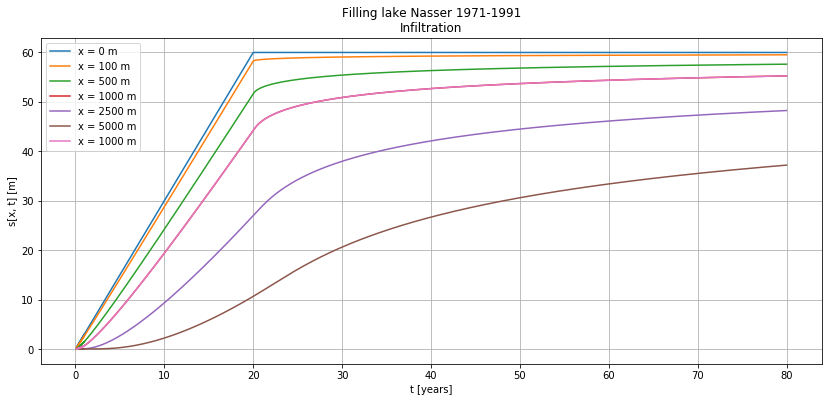

In [14]:
kD = 200 * 365 # m3/y
Sy = 0.1 # [-]
Dh = 60 # m
T = 20 # Y
A = Dh/T # m/y


ax0 = newfig(title='Filling lake Nasser 1971-1991\nhead as function of x', xlabel='x [m]', ylabel='water level [m]')
ax1 = newfig(title='Filling lake Nasser 1971-1991\nInfiltration at x=0', xlabel='t [years]', ylabel='Q[x=0] [m2/y]')

x_ = np.linspace(0, 30000, 201) # in m
t_= np.linspace(0, 80, 801)  # in years
t = [1, 2, 4, 8, 20, 40, 80] # year

t_[0] = t[1]/2

tFull = 20

for ti in t:
    sx, Qx = sQ(x_, ti, A=A, n=2, kD=kD, S=S)
    
    if ti > tFull: # after 20 years, the lake level is constant --> superimpose solution for A=-A
        s1, Q1 = sQ(x_, ti - tFull, A=-A, n=2, kD=kD, S=S)
        sx += s1
        Qx += Q1
        
    ax0.plot(x_, sx, label='t = {:.0f}'.format(ti))
ax0.legend()    

# Plot the discharge at x=0 as a function of time
st, Qt   = sQ(0, t_, A=A, n=2, kD=kD, S=S)
st1, Qt1 = sQ(0, t_[t_>tFull] - tFull, A=-A, n=2, kD=kD, S=S)
st[t_>tFull] += st1
Qt[t_>tFull] += Qt1
ax1.plot(t_, Qt)

ax2 = newfig(title='Filling lake Nasser 1971-1991\nInfiltration', xlabel='t [years]', ylabel='s[x, t] [m]')

x = [0, 100, 500, 1000, 2500, 5000, 1000]

for xi in x: # we want a f(t) for these x
    s, Q = sQ(xi, t_, A=Dh/T, n=2, kD=kD, S=S)
    s1, Q1 = sQ(xi, t_[t_ > tFull] - tFull, A=-Dh/T, n=2, kD=kD, S=S)
    s[t_ > tFull] += s1
    Q[t_ > tFull] += Q1
    ax2.plot(t_, s, label='x = {:.0f} m'.format(xi))
ax2.legend()    


# Implementing the Nasser lake example using only the solution for sudden level change

The Nasser Lake example can also be simulated by means of the solution for a sudden rise of the lake level. For this, we have to divide the gradual rise into one with many small increments and superimpose the effect of each of these. This is done below.

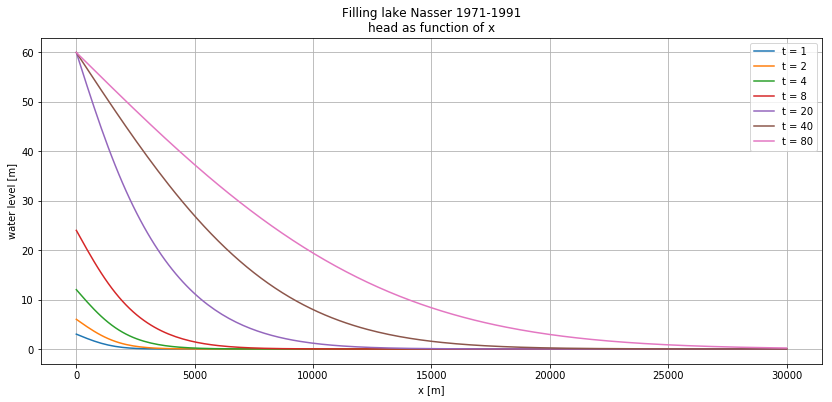

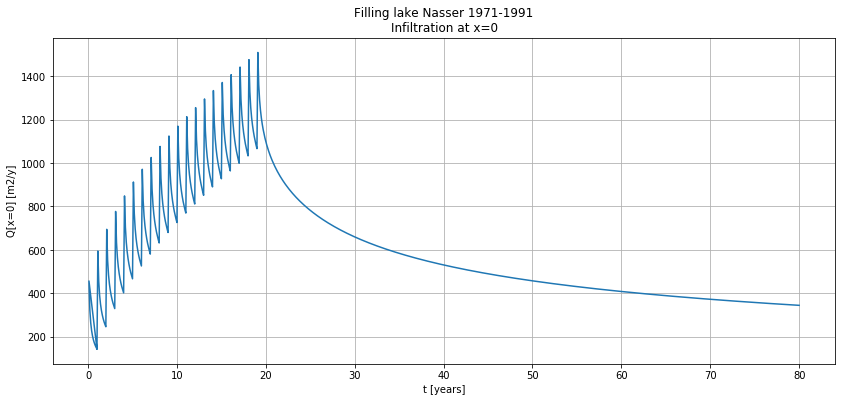

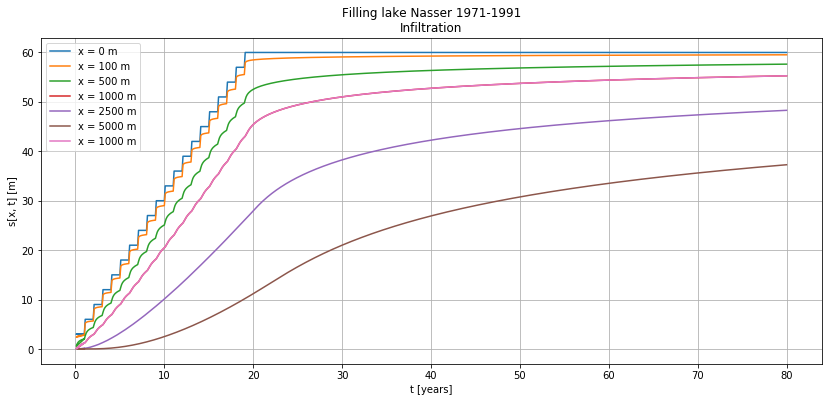

In [15]:
kD = 200 * 365 # m3/y
Sy = 0.1 # [-]
Dh = 60 # m
T = 20 # Y
A = Dh/T # m/y


ax0 = newfig(title='Filling lake Nasser 1971-1991\nhead as function of x', xlabel='x [m]', ylabel='water level [m]')

x_ = np.linspace(0, 30000, 201) # in m
t_ = np.linspace(0, 80, 801)  # in years
t_[0] = t[1]/2 # prevent t[0]=0

t  = [1, 2, 4, 8, 20, 40, 80] # years for snapshots


tch = np.arange(20.)          # change times for lake level, once per year
dA = np.ones_like(tch) * Dh/T # each tch the same step Dh/T m/y

for ti in t: # we want a snapshot at these times
    s = np.zeros_like(x_)
    Q = np.zeros_like(x_)
    for tc, dAi in zip(tch, dA):
        if tc < ti:
            s1, Q1 = sQ(x_, ti - tc, A=dAi, n=0, kD=kD, S=S)
            s += s1
            Q += Q1
    ax0.plot(x_, s, label='t = {:.0f}'.format(ti))
ax0.legend()    

# Plot the discharge at x=0 as a function of time

ax1 = newfig(title='Filling lake Nasser 1971-1991\nInfiltration at x=0', xlabel='t [years]', ylabel='Q[x=0] [m2/y]')

s = np.zeros_like(t_)
Q = np.zeros_like(t_)
for tc, dAi in zip(tch, dA):
    st, Qt = sQ(0, t_[t_ > tc] - tc, A=dAi, n=0, kD=kD, S=S)
    s[t_ > tc] += st
    Q[t_ > tc] += Qt
ax1.plot(t_, Q)


# Now for all times and different x

ax2 = newfig(title='Filling lake Nasser 1971-1991\nInfiltration', xlabel='t [years]', ylabel='s[x, t] [m]')

x = [0, 100, 500, 1000, 2500, 5000, 1000]

for xi in x: # we want a f(t) for these x
    s = np.zeros_like(t_)
    Q = np.zeros_like(t_)
    for tc, dAi in zip(tch, dA):
        s1, Q1 = sQ(xi, t_[t_ > tc] - tc, A=dAi, n=0, kD=kD, S=S)
        s[t_ > tc] += s1
        Q[t_ > tc] += Q1
    ax2.plot(t_, s, label='x = {:.0f} m'.format(xi))
ax2.legend()    


# Example, superposition in time

Consider a situation with $kD=400$ $m^{2}/d$ and $S_{y}=0.1$. The river-water level $A=\left[\,1.0,\,-0.5,\,+0.5,-0.25\right]$ at $t_{ch}=\left[0.5,\,0.8,\,1.0,\,2.0\right]$. Show the groundwater level as a function of time for $x=50$ m for $0\le t\le5$ d. In this case it is convenient to take t in hours to get sufficient detail.

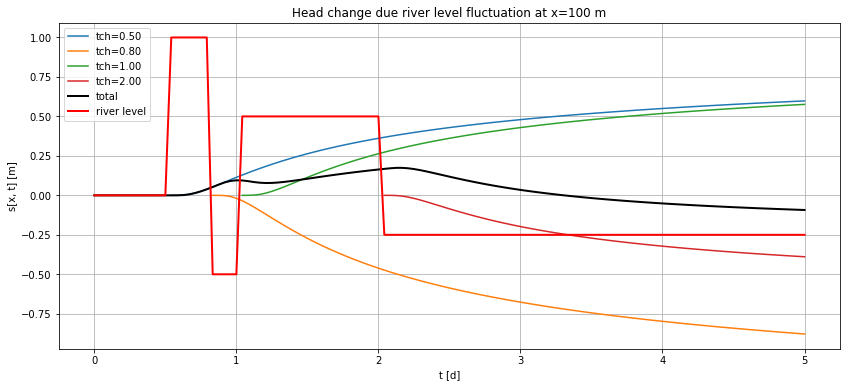

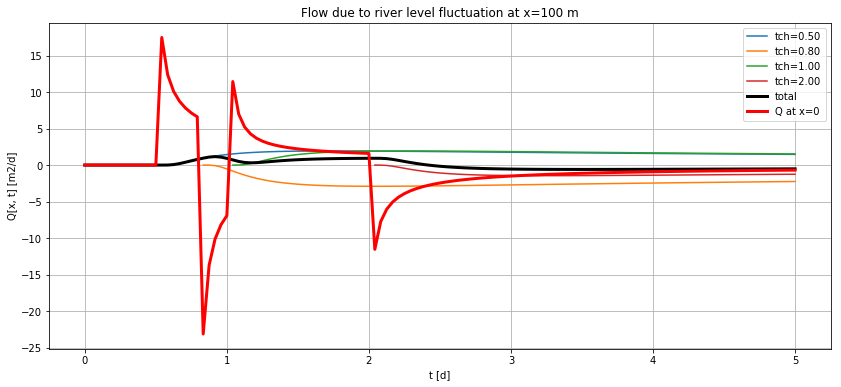

In [16]:
kD = 400 # m2/d
S = 0.1 # [-]

A   = [0, 1.0, -0.5, +0.5, -0.25]
tch = [0.5, 0.8, 1.0, 2.0]
x = [0, 100, 250, 500]

t_ = np.linspace(0, 5, 5 * 24 + 1)

dA = np.diff(np.array(A))

ax0 = newfig(xlabel='t [d]', ylabel='s[x, t] [m]')
ax1 = newfig(xlabel='t [d]', ylabel='Q[x, t] [m2/d]')

for xi in x[1:2]:
    ax0.set_title('Head change due river level fluctuation at x={:.0f} m'.format(xi))
    ax1.set_title('Flow due to river level fluctuation at x={:.0f} m'.format(xi))
    s = np.zeros_like(t_)
    Q = np.zeros_like(t_)
    for tc, dAi in zip(tch, dA):
        s1, Q1 = sQ(xi, t_[t_ > tc] - tc, A=dAi, n=0, kD=kD, S=S)
        ax0.plot(t_[t_ > tc], s1, label='tch={:.2f}'.format(tc))
        ax1.plot(t_[t_ > tc], Q1, label='tch={:.2f}'.format(tc))
        s[t_ > tc] += s1
        Q[t_ > tc] += Q1
    ax0.plot(t_, s, 'k', lw=2, label='total')
    ax1.plot(t_, Q, 'k', lw=3, label='total')
    
for xi in x[0:1]:
    s = np.zeros_like(t_)
    Q = np.zeros_like(t_)
    for tc, dAi in zip(tch, dA):
        s1, Q1 = sQ(xi, t_[t_ > tc] - tc, A=dAi, n=0, kD=kD, S=S)
        s[t_ > tc] += s1
        Q[t_ > tc] += Q1
    ax0.plot(t_, s, 'r', lw=2, label='river level')
    ax1.plot(t_, Q, 'r', lw=3, label='Q at x=0')

ax0.legend()
ax1.legend()


# Basin of width L, with head change only at left side

This requires superposition of a infinite number of mirror ditches.

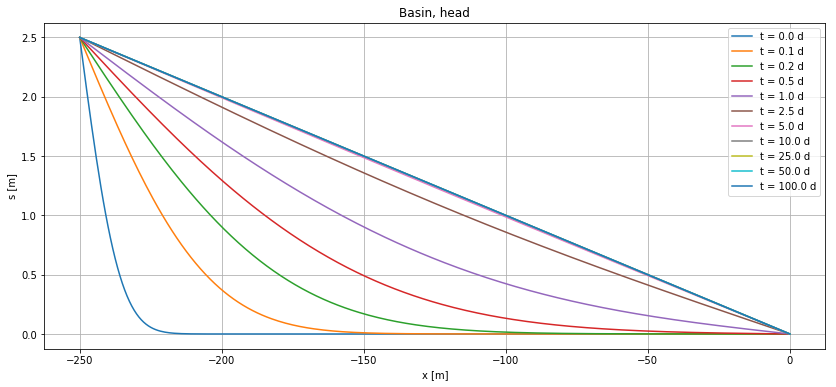

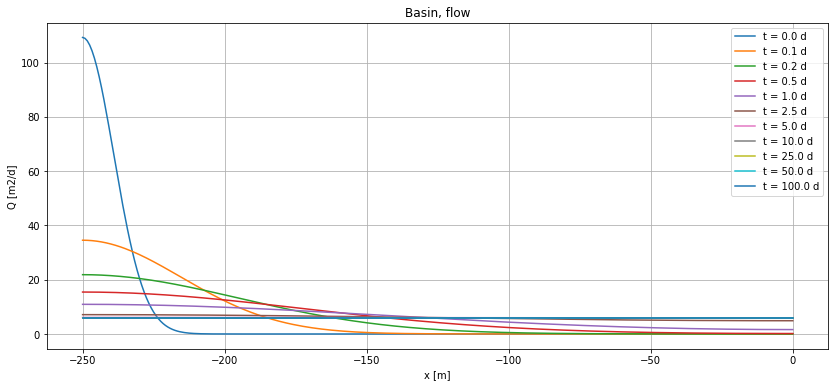

In [17]:
kD = 600 # m2/d
S = 0.1
L = 250 # m
A = 2.5 # m

x_ = np.linspace(-L, 0, 301)
t = [0.01, 0.1, 0.25, 0.5, 1.0, 2.5, 5, 10, 25, 50, 100] # d

ax0 = newfig(title='Basin, head', xlabel='x [m]', ylabel='s [m]')
ax1 = newfig(title='Basin, flow', xlabel='x [m]', ylabel='Q [m2/d]')

for ti in t:
    s = np.zeros_like(x_)
    Q = np.zeros_like(x_)
    for i in range(1, 10): # note that first i is 1 not 0
        sL, QL = sQ((2 * i - 1) * L + x_, ti, A=+A, n=0, kD=kD, S=S)
        sR, QR = sQ((2 * i - 1) * L - x_, ti, A=-A, n=0, kD=kD, S=S)
        s += sL + sR # note the plus  sR
        Q += QL - QR # note the minus QR
    ax0.plot(x_, s, label='t = {:.1f} d'.format(ti))
    ax1.plot(x_, Q, label='t = {:.1f} d'.format(ti))
ax0.legend()
ax1.legend()

# General case, strip of land with different head change on either side

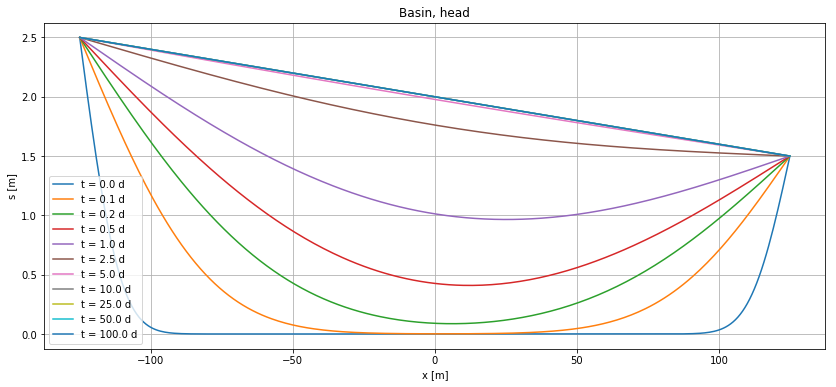

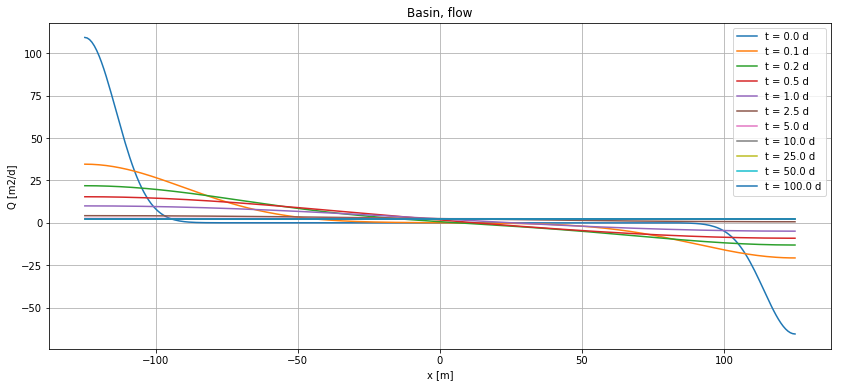

In [18]:
kD = 600 # m2/d
S = 0.1
L = 250 # m
A = 2.5 # m
B = 1.5 # m

x_ = np.linspace(-L/2, L/2, 301)
t = [0.01, 0.1, 0.25, 0.5, 1.0, 2.5, 5, 10, 25, 50, 100] # d

ax0 = newfig(title='Basin, head', xlabel='x [m]', ylabel='s [m]')
ax1 = newfig(title='Basin, flow', xlabel='x [m]', ylabel='Q [m2/d]')

for ti in t:
    s = np.zeros_like(x_)
    Q = np.zeros_like(x_)
    for i in range(1, 10): # note that first i is 1 not 0
        sAL, QAL = sQ((2 * i - 1) * L + (x_ - L/2), ti, A=+A, n=0, kD=kD, S=S)
        sAR, QAR = sQ((2 * i - 1) * L - (x_ - L/2), ti, A=-A, n=0, kD=kD, S=S)
        sBL, QBL = sQ((2 * i - 1) * L + (x_ + L/2), ti, A=-B, n=0, kD=kD, S=S)
        sBR, QBR = sQ((2 * i - 1) * L - (x_ + L/2), ti, A=+B, n=0, kD=kD, S=S)
        
        s += sAL + sAR + sBL + sBR # note the plus  sR
        Q += QAL - QAR + QBL - QBR # note the minus QR
    ax0.plot(x_, s, label='t = {:.1f} d'.format(ti))
    ax1.plot(x_, Q, label='t = {:.1f} d'.format(ti))
ax0.legend()
ax1.legend()

# Symmetrical case of strip of land, interpreted as a drainage problem after a precipitation shower

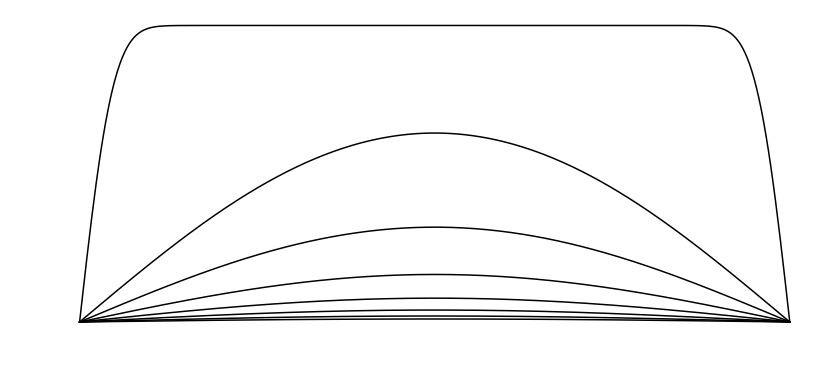

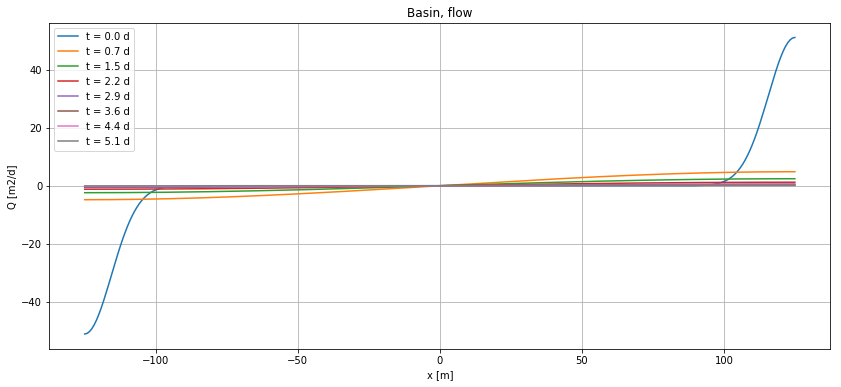

In [19]:
kD = 600 # m2/d
S = 0.1
P = 0.1 # m
L = 250 # m
A = P/S # m
B = P/S # m
T = 0.28 * (L/2) ** 2 * S / kD

x_ = np.linspace(-L/2, L/2, 301)
t = np.arange(0,8) * T
t[0] = 0.01 * T

ax0 = newfig(title='Basin, head', xlabel='x [m]', ylabel='s [m]')
ax1 = newfig(title='Basin, flow', xlabel='x [m]', ylabel='Q [m2/d]')

for ti in t:
    s = np.zeros_like(x_) + A
    Q = np.zeros_like(x_)
    for i in range(1, 10): # note that first i is 1 not 0
        sAL, QAL = sQ((2 * i - 1) * L + (x_ - L/2), ti, A=+A, n=0, kD=kD, S=S)
        sAR, QAR = sQ((2 * i - 1) * L - (x_ - L/2), ti, A=-A, n=0, kD=kD, S=S)
        sBL, QBL = sQ((2 * i - 1) * L + (x_ + L/2), ti, A=-B, n=0, kD=kD, S=S)
        sBR, QBR = sQ((2 * i - 1) * L - (x_ + L/2), ti, A=+B, n=0, kD=kD, S=S)
        
        s -= sAL + sAR + sBL + sBR # note the plus  sR
        Q -= QAL - QAR + QBL - QBR # note the minus QR
    ax0.plot(x_, s, 'k', label='t = {:.1f} d'.format(ti))
    ax1.plot(x_, Q, label='t = {:.1f} d'.format(ti))
ax0.set_axis_off()
ax0.set_title('')
#ax0.legend()
ax1.legend()

# Comparing the basin drainage solution (Kraaijenhoff vd Leur) with that by superposition using the 1D solution with just erfc.

In [21]:
def kvdleur(x=None, t=None, b=None, A=None, kD=None, S=None, n=25):
    '''Return head and flows due to drainage of a strip of land with s(x,0)=A
        Solution in the Netherlands known as "given by "Kraaijenhof ver der Leur (19??)"",
        but also given by Carslaw and Jaeger (1959, p97, eq. 8)
    '''
    
    s = np.zeros_like(x_)
    Q = np.zeros_like(x_)
    u = kD * t / (b ** 2 * S)
    for j in range(1, n + 1):
        p = (2 * j - 1) * np.pi / 2
        sw = (-1) ** (j - 1)
        s += 4 * A /np.pi   * np.cos(p * x / b) * np.exp(- p ** 2 * u) * sw / (2 * j - 1)
        Q += 2 * kD * A / b * np.sin(p * x / b) * np.exp(- p ** 2 * u) * sw
    return s, Q
    

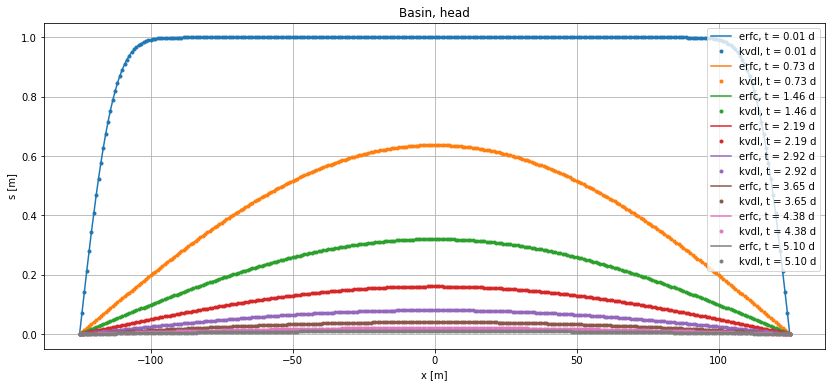

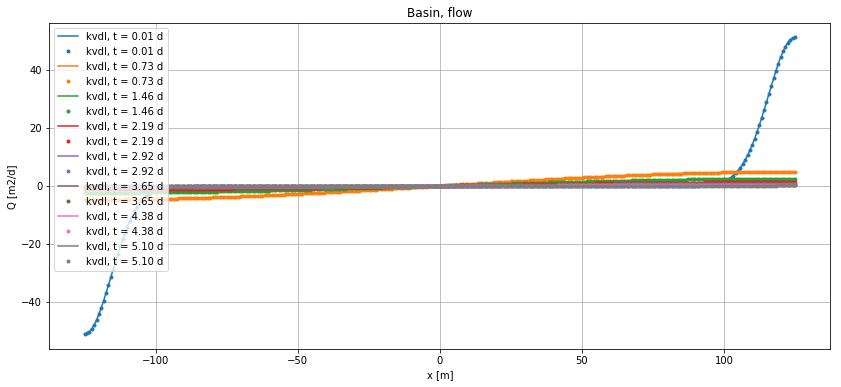

In [22]:
kD = 600 # m2/d
S = 0.1
P = 0.1 # m
L = 250 # m
A = P/S # m
B = P/S # m
T = 0.28 * (L/2) ** 2 * S / kD

x_ = np.linspace(-L/2, L/2, 301)
t = np.arange(0,8) * T
t[0] = 0.01 * T

ax0 = newfig(title='Basin, head', xlabel='x [m]', ylabel='s [m]')
ax1 = newfig(title='Basin, flow', xlabel='x [m]', ylabel='Q [m2/d]')

for ti in t:
    skl, Qkl = kvdleur(x=x_, t=ti, b=L/2, A=A, kD=kD, S=S)
    
    s = np.zeros_like(x_) + A
    Q = np.zeros_like(x_)
    for i in range(1, 10): # note that first i is 1 not 0
        sAL, QAL = sQ((2 * i - 1) * L + (x_ - L/2), ti, A=+A, n=0, kD=kD, S=S)
        sAR, QAR = sQ((2 * i - 1) * L - (x_ - L/2), ti, A=-A, n=0, kD=kD, S=S)
        sBL, QBL = sQ((2 * i - 1) * L + (x_ + L/2), ti, A=-B, n=0, kD=kD, S=S)
        sBR, QBR = sQ((2 * i - 1) * L - (x_ + L/2), ti, A=+B, n=0, kD=kD, S=S)
        
        s -= sAL + sAR + sBL + sBR # note the plus  sR
        Q -= QAL - QAR + QBL - QBR # note the minus QR
    l = ax0.plot(x_, s, label='erfc, t = {:.2f} d'.format(ti))
    ax0.plot(x_, skl, '.', color=l[0].get_color(), label='kvdl, t = {:.2f} d'.format(ti))    
    l = ax1.plot(x_, Q, label='kvdl, t = {:.2f} d'.format(ti))
    ax1.plot(x_, Qkl, '.', color=l[0].get_color(), label='kvdl, t = {:.2f} d'.format(ti))
ax0.legend()
ax1.legend()

# Show individual terms of the series contributing to the complete Kraaijenhoff van der Leur solution

In [23]:
def kvdleur2(x=None, t=None, b=None, A=None, kD=None, S=None, n=25):
    '''Return head and flows due to drainage of a strip of land with s(x,0)=A
        Solution in the Netherlands known as "given by "Kraaijenhof ver der Leur (19??)"",
        but also given by Carslaw and Jaeger (1959, p97, eq. 8)
    '''
    
    ax0 = newfig(title='Basin, head', xlabel='x [m]', ylabel='s [m]')
    ax1 = newfig(title='Basin, flow', xlabel='x [m]', ylabel='Q [m2/d]')

    def term(n):
        p = (2 * j - 1) * np.pi / 2
        sw = (-1) ** (j - 1)
        sn = 4 * A /np.pi   * np.cos(p * x / b) * np.exp(- p ** 2 * u) * sw / (2 * j - 1)
        Qn = 2 * kD * A / b * np.sin(p * x / b) * np.exp(- p ** 2 * u) * sw
        return sn, Qn

    s = np.zeros_like(x_)
    Q = np.zeros_like(x_)
    u = kD * t / (b ** 2 * S)
    for j in range(1, n + 1):
        sn, Qn = term(j)
        ax0.plot(x_, sn, label='j= {}'.format(j))
        ax1.plot(x_, Qn, label='j= {}'.format(j))
        s += sn
        Q += Qn
                 
    ax0.plot(x_, s, label='total')
    ax1.plot(x_, Q, label='total')
    
    ax0.legend()
    ax1.legend()
    return s, Q

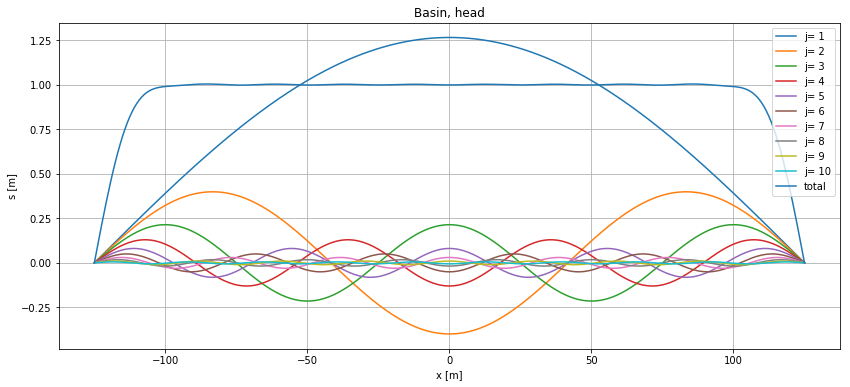

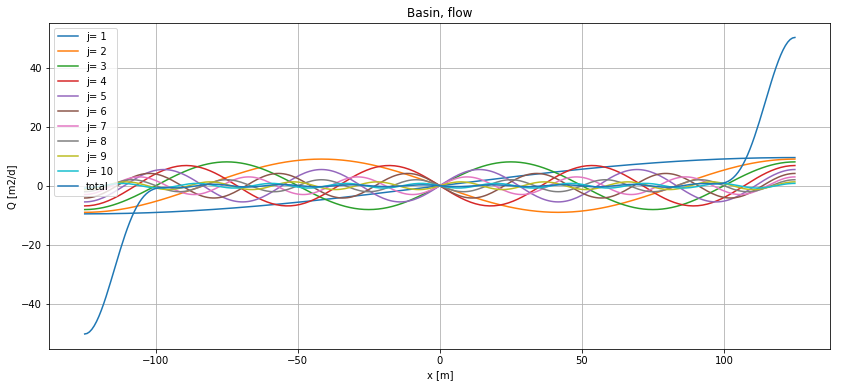

In [24]:
kD = 600 # m2/d
S = 0.1
P = 0.1 # m
L = 250 # m
A = P/S # m
B = P/S # m
T = 0.28 * (L/2) ** 2 * S / kD

x_ = np.linspace(-L/2, L/2, 301)
t = np.arange(0,8) * T
t[0] = 0.01 * T

_ = kvdleur2(x=x_, t=t[0], b=L/2, A=A, kD=kD, S=S, n=10)
